In [2]:
#Monte carlo symulacja całki Ito

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
T=1.0
N=10000
dt=T/N # krok czaoswy w ruchu Browna W(t+dt)-W(t) 


In [5]:
#Całkujemy z definicji jako suma H(t)*[W(t+dt)-W(t)] gdzie W(t+dt)-W(t) = dW i ma rozklad N(0,dt)
#inicjalizacja wektora dW

#tworzymy wektor N wartosci z rozkladu N(0,1) i skalujemy przez sqrt(dt) zeby wariancja wyszla dt
#to jest wektor przyrostów W(t+dt)-W(t)!
dW=np.sqrt(dt)*np.random.normal(size=N)

#Tworzymy wektor W(t) gdzie kazdy element jest sumą poprzednich dW. bo W(t)=W(t-1) + dW 
W=np.cumsum(dW)
#dodajemy zero na początek bo proces browna startuje od 0
W = np.insert(W, 0, 0)

#mamy dwa wektory dla dW i W. W jest nam potrzebne do obliczenia H(t)=exp(W(t))
#wszystkie elemnty W poza ostatnim. Inaczej numpy nie bedzię mógł przemnożyć H * dW bo wymiary nie bedą się zgadzać
H=np.exp(W[:-1])
#obliczamy wktor przyrostów całki to NIE JEST jeszcze cała trajektoria, gdyż cała trajektoria to wynik dodawania następnych elemntów tego wektora
incremeants= H*dW

#teraz robimy wektor oddający trajektorie i dodajemy zero bo proces zaczyna od 0

trajectory=np.cumsum(incremeants)
trajectory = np.insert(trajectory, 0, 0)




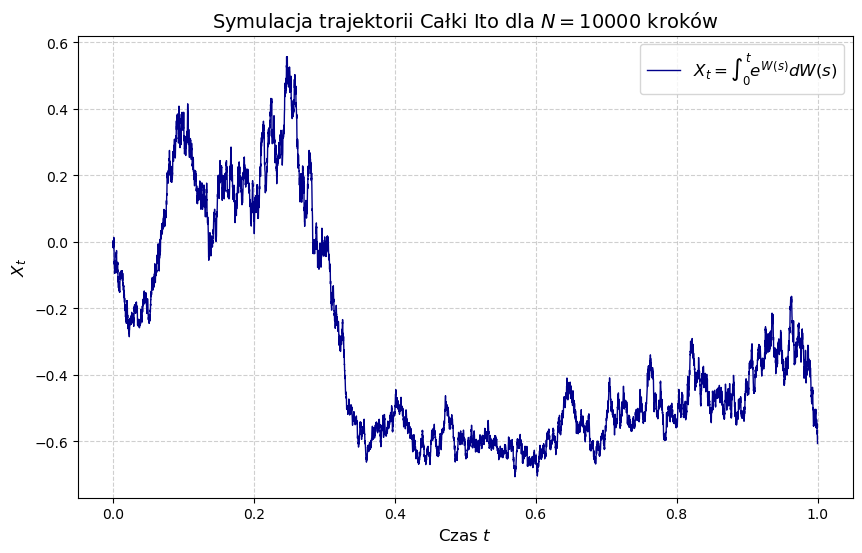

In [6]:
t = np.linspace(0, T, N + 1)

plt.figure(figsize=(10, 6))
plt.plot(t, trajectory, label=r'$X_t = \int_0^t e^{W(s)}dW(s)$', color='darkblue', linewidth=1)
plt.title(f'Symulacja trajektorii Całki Ito dla $N={N}$ kroków', fontsize=14)
plt.xlabel('Czas $t$', fontsize=12)
plt.ylabel('$X_t$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [113]:
#Sprawdzenie włąsności martyngału symulacyjnie;
#pomysł-zaysumlować tą całke wiele razy(parametr i<--ilość sciezek) i brac roznice miedzy t+1 a t. dla jakichś ustalonych t. Potem wziąć średnią powina być +/- 0.
#Powtarzać wszystko j razy.
#wyniki powinny być ciągle bliskie 0

T=1.0
N=100000
dt=T/N 
for j in range(100):
    means_vector=[]
    for i in range(300):
        dW=np.sqrt(dt)*np.random.normal(size=N)
        W=np.cumsum(dW)
        W = np.insert(W, 0, 0)
        H=np.exp(W[:-1])
        incremeants= H*dW
        trajectory=np.cumsum(incremeants)
        trajectory = np.insert(trajectory, 0, 0)
        #ustalenie t i t+1 <-- możnaby to zrobić dla różnych a nie ustalać z góry ale wynik wyjdzie taki sam
        stop_moment_1=trajectory[500]
        stop_moment_2=trajectory[499]
        difference=stop_moment_1-stop_moment_2
        #wektor różnić dla i realizacji 
        means_vector.append(difference)
    print(np.mean(means_vector))

-3.692982744355196e-05
3.634027586456548e-05
-0.00011794277292682875
3.813687233227408e-05
-3.7438044373648774e-05
0.00016435797673700493
-0.00022470452212610385
-5.113156870107155e-05
0.00019988886329713198
-0.00038759652936125197
0.00013289980016392805
-6.861477738160137e-05
-5.3362267260213155e-05
3.841246770163422e-05
0.00013798864190027888
-0.0001751127082401983
1.4192424555367662e-05
1.6327658549224072e-05
0.00031733549137785623
0.00022510401180217526
0.00019717117161973156
-0.00019574580253918264
-4.01282525169884e-05
4.008909548929386e-05
-0.00024183569146095198
-5.370066904081181e-05
1.2034888122256956e-05
0.00042221563243878584
4.910183973073717e-05
7.001460072411069e-07
-0.00025456972068681275
-7.930689606648786e-05
0.00011071429151300473
-0.0002090983900672697
0.0001124370132937777
0.0001938137865155697
0.00021081448826639745
-9.685796956690716e-05
8.30152821651854e-05
7.223116347683523e-05
6.843182476411566e-05
0.00022350641644208798
-2.871657848295184e-05
-0.0001775102937

NameError: name 'all_means' is not defined

<Figure size 1000x600 with 0 Axes>